<a href="https://colab.research.google.com/github/Jayashree190/PREDICTING_GENRE_FROM_MOVIE_POSTERS/blob/master/CODE2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 16kB/s 
     |████████████████████████████████| 4.3MB 54.3MB/s 
     |████████████████████████████████| 501kB 54.1MB/s 


In [0]:
import tensorflow as tf
from tensorflow.keras import Sequential

In [0]:
from tensorflow.keras.layers import Flatten ,Dense ,Dropout ,BatchNormalization ,MaxPool2D ,Conv2D

In [0]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

In [6]:
print(tf.__version__)

2.0.0-rc0


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [9]:
!git clone https://github.com/laxmimerit/Movies-Poster_Dataset.git

Cloning into 'Movies-Poster_Dataset'...
remote: Enumerating objects: 7873, done.
remote: Total 7873 (delta 0), reused 0 (delta 0), pack-reused 7873
Receiving objects: 100% (7873/7873), 246.59 MiB | 62.72 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (7871/7871), done.


In [0]:
data=pd.read_csv('/content/Movies-Poster_Dataset/train.csv')

In [11]:
data.shape

(7254, 27)

In [12]:
data.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [13]:
image_width=350
image_height=350

X=[]

for i in tqdm(range(data.shape[0])):
  path = "/content/Movies-Poster_Dataset/Images/" + data['Id'][i] +".jpg"
  img = image.load_img(path, target_size=(image_width, image_height,3))
  img = image.img_to_array(img)
  img = img/255.0
  X.append(img)

X=np.array(X)





100%|██████████| 7254/7254 [00:29<00:00, 249.21it/s]


In [14]:
X.shape

(7254, 350, 350, 3)

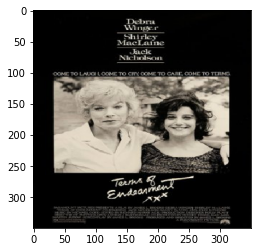

In [15]:
plt.imshow(X[0])

In [16]:
data['Genre'][0]

"['Comedy', 'Drama']"

In [18]:
y = data.drop(['Id', 'Genre'],axis=1)
y = y.to_numpy()
y.shape 

(7254, 25)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X , y, random_state=0,test_size = 0.15)

In [0]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape= X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(120, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(120, activation= 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(120, activation= 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(25, activation= 'sigmoid'))



In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 348, 348, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 348, 348, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 174, 174, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 174, 174, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 172, 172, 32)      4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 172, 172, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 86, 86, 32)        0

In [0]:
model.compile(optimizer='adam' , loss= 'binary_crossentropy',metrics=['accuracy'])

In [23]:
history = model.fit(X_train,y_train , epochs=5 , validation_data=(X_test,y_test))

Train on 6165 samples, validate on 1089 samples
Epoch 1/5
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
6165/6165 [==============================] - 186s 30ms/sample - loss: 0.7031 - accuracy: 0.6362 - val_loss: 0.4558 - val_accuracy: 0.8539
Epoch 2/5
6165/6165 [==============================] - 178s 29ms/sample - loss: 0.3147 - accuracy: 0.8881 - val_loss: 0.2549 - val_accuracy: 0.9066
Epoch 3/5
6165/6165 [==============================] - 184s 30ms/sample - loss: 0.2611 - accuracy: 0.9068 - val_loss: 0.2424 - val_accuracy: 0.9084
Epoch 4/5
6165/6165 [==============================] - 178s 29ms/sample - loss: 0.2503 - accuracy: 0.9095 - val_loss: 0.2392 - val_accuracy: 0.9125
Epoch 5/5
6165/6165 [==============================] - 176s 29ms/sample - loss: 0.2453 - accuracy: 0.9113 - val_loss: 0.2381 - val_accuracy: 0.9114


In [0]:
def plot_learningCurve(history, epoch):
  epoch_range = range(1,epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train' , 'val'],loc='upper left')
  plt.show()

  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('Epoch')
  plt.legend(['Train' , 'val'],loc='upper left')
  plt.show()

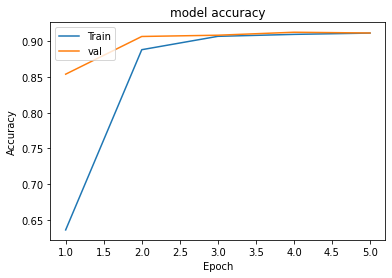

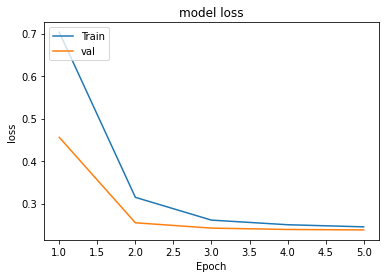

In [25]:
plot_learningCurve(history, 5)

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'N/A', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')
Drama
Comedy
Romance


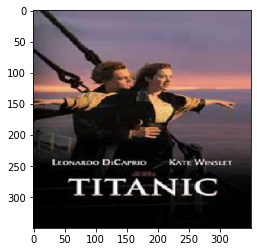

In [29]:
img=image.load_img('/content/Movies-Poster_Dataset/Images/titanic2.jpg',target_size=(image_width, image_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img= img.reshape(1, image_width, image_height,3)

classes = data.columns[2:]
print(classes)

y_prob = model.predict(img)

top3=np.argsort(y_prob[0])[:-4:-1]

for i in range(3):
	print(classes[top3[i]])

